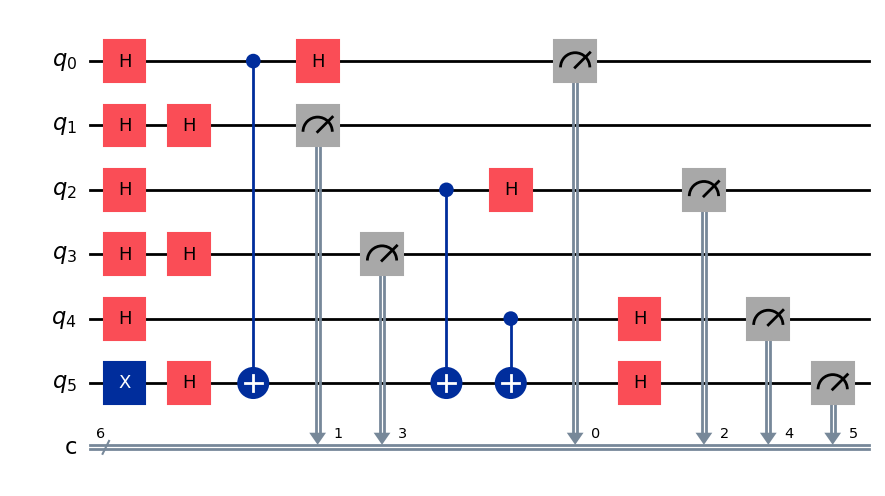

In [1]:
import qiskit 
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np
import math

XORor = QuantumCircuit(6,6) # Initialize circuit with two qubits
# Prepare quantum state
a = [0,0,0,0,0]
def prep(qn, st):
    if st==1:
        XORor.x(qn)
prep(0,a[0])
prep(1,a[1])
prep(2,a[2])
prep(3,a[3])
prep(4,a[4])

XORor.h(0)
XORor.h(1)
XORor.h(2)
XORor.h(3)
XORor.h(4)
XORor.x(5)
XORor.h(5)

XORor.cx(0,5)
#XORor.cx(1,5)
XORor.cx(2,5)
#XORor.cx(3,5)
XORor.cx(4,5)

XORor.h(0)
XORor.h(1)
XORor.h(2)
XORor.h(3)
XORor.h(4)

XORor.h(5)

XORor.measure(0,0)
XORor.measure(1,1)
XORor.measure(2,2)
XORor.measure(3,3)
XORor.measure(4,4)
XORor.measure(5,5)
#quantum teleportation circuit
XORor.draw('mpl')

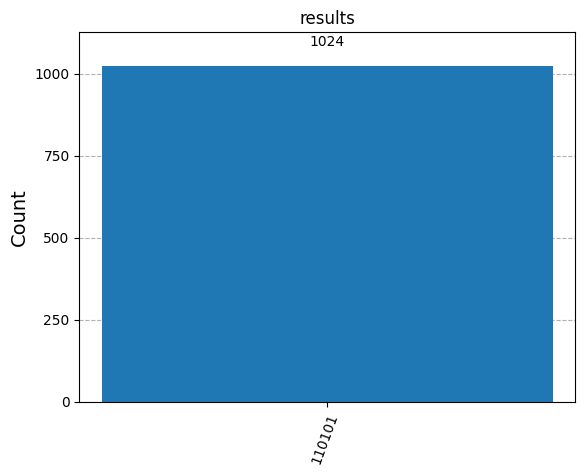

In [2]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_city

simulator = Aer.get_backend('qasm_simulator') 
#result = execute(circuit, simulator, shots=1000).result()
simulator = AerSimulator()
circ = transpile(XORor, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(XORor)
plot_histogram(counts, title='results')